In [1]:
import requests as req
from bs4 import BeautifulSoup
import time
import numpy as np
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
import json
from scipy import stats
import itertools
from copy import deepcopy
sns.set_style("darkgrid")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
def mkdate(ts):
    return datetime.datetime.fromtimestamp(
        int(ts)
    ).strftime('%Y-%m-%d')

## Retrieve Tether printing events

In [3]:
pages = 10
params = {"addr": "3MbYQMMmSkC3AgWkj9FMo5LsPTW1zBTwXL"}
s = req.Session()
r1 = s.get("https://www.omniexplorer.info/address/3MbYQMMmSkC3AgWkj9FMo5LsPTW1zBTwXL/10")

transactions = []
for page in np.arange(pages, 0, -1):
    r2 = s.post("https://api.omniexplorer.info/v1/transaction/address/{}".format(page), data=params)
    ans = r2.json()
    for trans in ans["transactions"]:
        if trans["type"] == "Grant Property Tokens" and trans["propertyname"] == "TetherUS" and trans["valid"] == True:
            transactions.append([trans["blocktime"], trans["amount"]])
    time.sleep(0.5)

# order them by timestamp
transactions.sort(key=lambda x: x[0])
initdate = datetime.datetime.fromtimestamp(transactions[0][0])
for ts in transactions:
    delta = datetime.datetime.fromtimestamp(ts[0])-initdate
    ts.append(delta.days)

In [4]:
[[i, mkdate(x[0]), x[0], x[1], x[2]] for i, x in enumerate(transactions)]

[[0, '2015-05-18', 1431971331, '200000.00000000', 0],
 [1, '2015-12-01', 1449003673, '500000.00000000', 197],
 [2, '2016-01-06', 1452049855, '500000.00000000', 232],
 [3, '2016-04-29', 1461885701, '500000.00000000', 346],
 [4, '2016-06-01', 1464800569, '1000000.00000000', 379],
 [5, '2016-06-14', 1465930948, '1000000.00000000', 393],
 [6, '2016-06-14', 1465930967, '2000000.00000000', 393],
 [7, '2016-07-12', 1468347088, '1000000.00000000', 421],
 [8, '2016-12-30', 1483140129, '3000000.00000000', 592],
 [9, '2017-01-05', 1483641542, '5000000.00000000', 597],
 [10, '2017-01-31', 1485883728, '10000000.00000000', 623],
 [11, '2017-03-07', 1488894685, '10000000.00000000', 658],
 [12, '2017-03-17', 1489743182, '10000000.00000000', 668],
 [13, '2017-03-29', 1490813384, '10000000.00000000', 681],
 [14, '2017-04-18', 1492515587, '10000000.00000000', 700],
 [15, '2017-05-24', 1495632421, '10000000.00000000', 736],
 [16, '2017-05-25', 1495736299, '10000000.00000000', 738],
 [17, '2017-05-26', 149

In [5]:
print("First USDt issued on {}".format(mkdate(transactions[0][0])))
print("Total amount of USDt printed: {}".format(np.sum([float(x[1]) for x in transactions])))

First USDt issued on 2015-05-18
Total amount of USDt printed: 3049748400.0


In [6]:
alltransactions = deepcopy(transactions)
#transactions = transactions[0:71] 

## Get Bitcoin price data

### 1-hour charts

In [7]:
start_timestamp = transactions[17][0] # skip first prints, focus on the second half of 2017 and on
end_timestamp = int(time.time())
one_week = 3600*24*7 # s
one_day = 3600*24 # s
weeks = list(np.arange(start_timestamp, end_timestamp, one_week))
days_recorded = (datetime.datetime.fromtimestamp(end_timestamp)-datetime.datetime.fromtimestamp(start_timestamp)).days
print(days_recorded)

612


In [8]:
data = []
s = req.Session()
r = s.get("https://www.coindesk.com/price/")
for i in range(1, len(weeks)):
    start_weekday = mkdate(weeks[i-1])
    end_weekday = mkdate(weeks[i]-one_day)
    print(start_weekday, end_weekday)
    r = s.get("https://api.coindesk.com/charts/data?data=close&startdate={}&enddate={}&exchanges=bpi&dev=1&index=USD".format(start_weekday, end_weekday))
    ans = json.loads(r.text.replace("cb(", "").replace(");",""))["bpi"]
    ans.sort(key=lambda x: x[0])
    for pricepoint in ans:
        if pricepoint[0]/1000 >= weeks[i-1] and pricepoint[0]/1000 < (weeks[i]-one_day):
            data.append([int(pricepoint[0]/1000), pricepoint[1]])

2017-05-26 2017-06-01
2017-06-02 2017-06-08
2017-06-09 2017-06-15
2017-06-16 2017-06-22
2017-06-23 2017-06-29
2017-06-30 2017-07-06
2017-07-07 2017-07-13
2017-07-14 2017-07-20
2017-07-21 2017-07-27
2017-07-28 2017-08-03
2017-08-04 2017-08-10
2017-08-11 2017-08-17
2017-08-18 2017-08-24
2017-08-25 2017-08-31
2017-09-01 2017-09-07
2017-09-08 2017-09-14
2017-09-15 2017-09-21
2017-09-22 2017-09-28
2017-09-29 2017-10-05
2017-10-06 2017-10-12
2017-10-13 2017-10-19
2017-10-20 2017-10-26
2017-10-27 2017-11-02
2017-11-03 2017-11-09
2017-11-10 2017-11-16
2017-11-17 2017-11-23
2017-11-24 2017-11-30
2017-12-01 2017-12-07
2017-12-08 2017-12-14
2017-12-15 2017-12-21
2017-12-22 2017-12-28
2017-12-29 2018-01-04
2018-01-05 2018-01-11
2018-01-12 2018-01-18
2018-01-19 2018-01-25
2018-01-26 2018-02-01
2018-02-02 2018-02-08
2018-02-09 2018-02-15
2018-02-16 2018-02-22
2018-02-23 2018-03-01
2018-03-02 2018-03-08
2018-03-09 2018-03-15
2018-03-16 2018-03-22
2018-03-23 2018-03-29
2018-03-30 2018-04-05
2018-04-06

In [9]:
# before interpolation (hours per day)
len(data)/days_recorded

20.462418300653596

In [10]:
# interpolate missing datapoints
from scipy import interpolate
data_dic = {x[0]:x[1] for x in data}
data_x_incomplete = [x[0] for x in data]
data_y_incomplete = [x[1] for x in data]
f = interpolate.interp1d(data_x_incomplete, data_y_incomplete)
ts = data[0][0]
data_x = [data[0][0]]
data_y = [data[0][1]]
interpolated = 0
while True:
    ts += 3600
    if ts > end_timestamp: break
    if ts in data_dic:
        data_x.append(ts)
        data_y.append(data_dic[ts])
    else:
        try:
            ynew = f(ts)
            data_x.append(ts)
            data_y.append(ynew)
            interpolated += 1
        except:
            pass

In [11]:
interpolated

2069

In [12]:
# after interpolation (hours per day) ~24h
len(data_y)/days_recorded

23.84313725490196

## Prepare and plot results

In [13]:
pre_sum = np.sum([float(x[1]) for x in alltransactions[:17]])
transactions_cum = np.cumsum([float(x[1])+pre_sum for x in alltransactions[17:]])
transactions_x = [int(x[0]) for x in alltransactions[17:]]
transactions_y = [float(x[1]) for x in alltransactions[17:]]
subpoena_date = 1512561600 # 2017-12-6

Text(0, 0.5, 'Tether printed (USDT)')

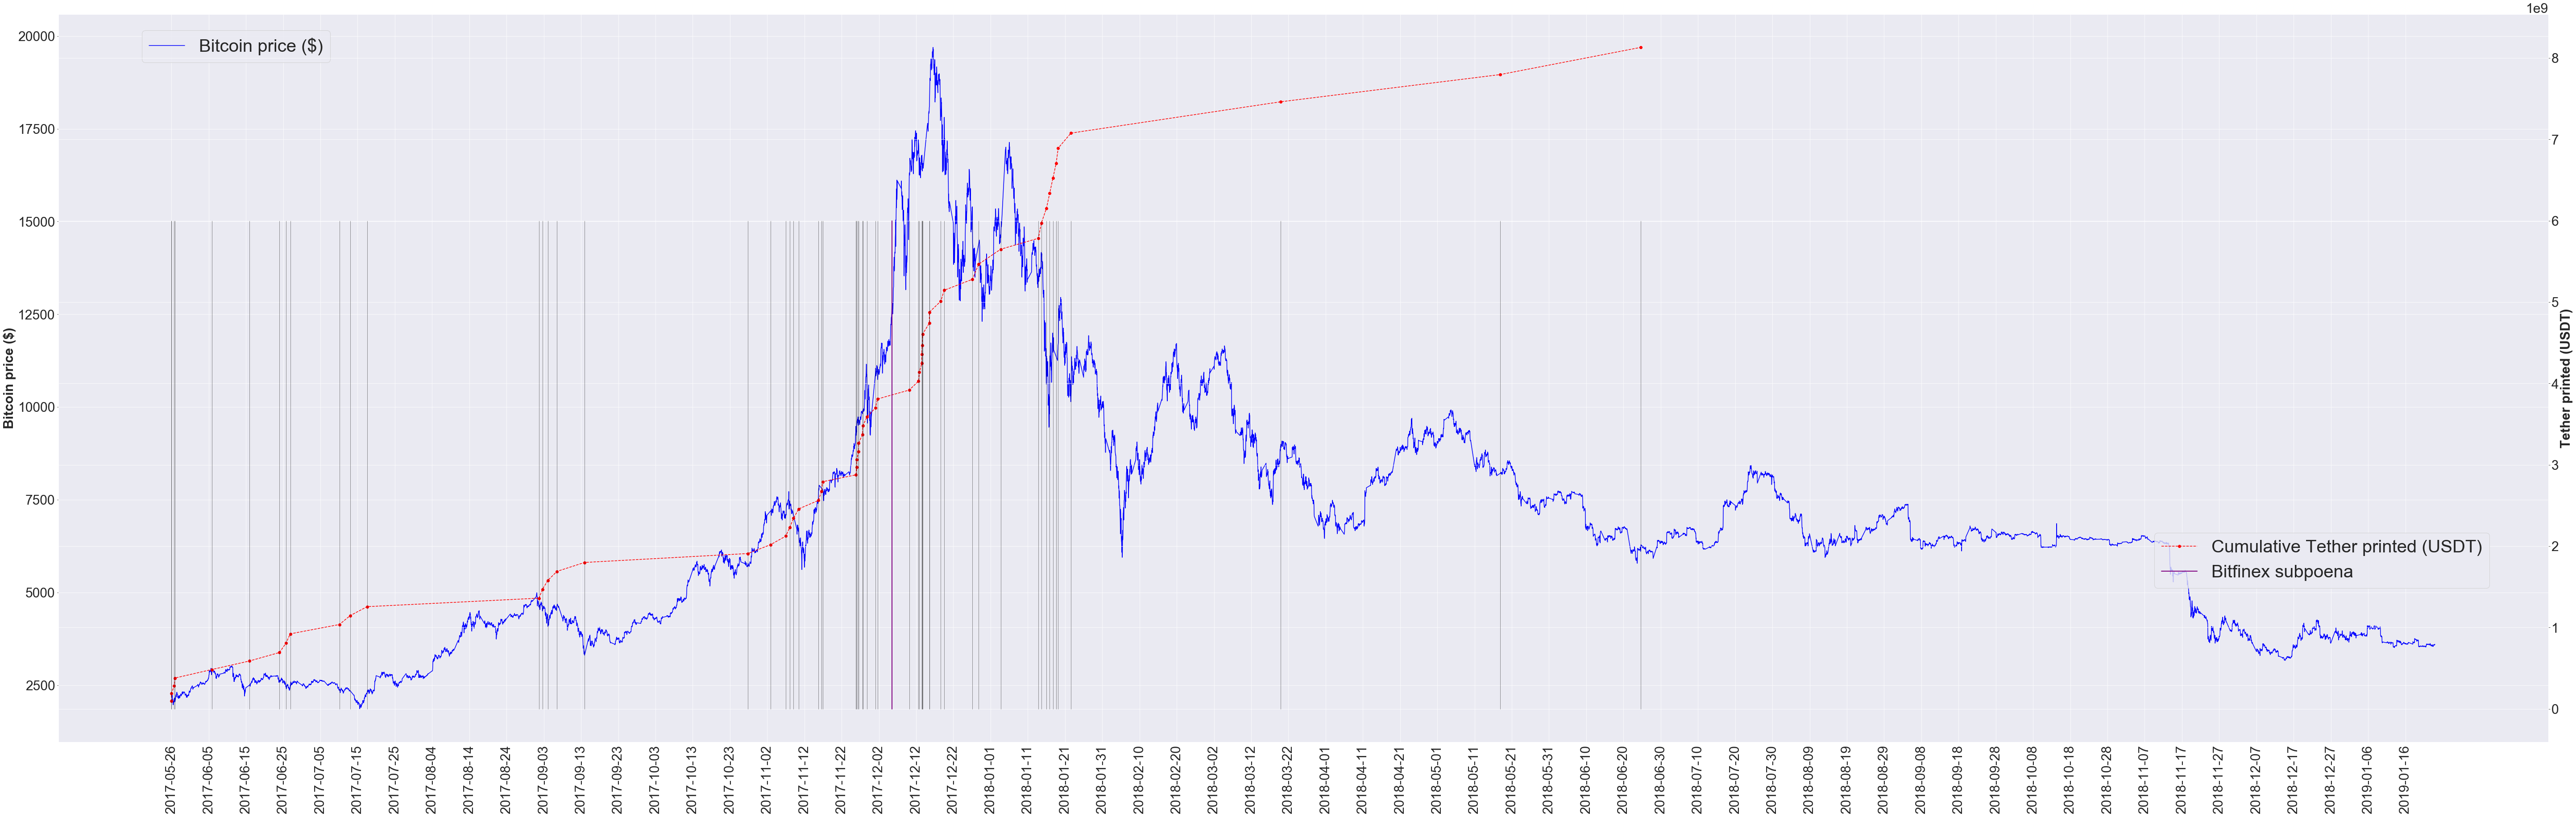

In [14]:
matplotlib.rcParams.update({'font.size': 30})
fig, ax1 = plt.subplots(figsize=(100,30))

plt.xticks(list(np.arange(data_x[0], data_x[-1], 10*24*3600)), [mkdate(x) for x in list(np.arange(data_x[0], data_x[-1], 10*24*3600))], rotation='vertical')

ax1.plot(data_x, data_y, label="Bitcoin price ($)", color="b")

ax2 = ax1.twinx()
ax2.plot(transactions_x, transactions_cum, "o--", label="Cumulative Tether printed (USDT)", color="r")
for ts in transactions_x:
    ax2.plot([ts, ts], [0, 6000000000], "-", color="black", alpha=0.7, linewidth=0.6)

ax2.plot([subpoena_date, subpoena_date], [0, 6000000000], "-", color="purple", alpha=1, linewidth=2, label="Bitfinex subpoena")
ax1.legend(loc='upper left', fontsize=40, bbox_to_anchor=(0.03, 0.99))
ax2.legend(loc='upper right', fontsize=40, bbox_to_anchor=(0.98, 0.3))
ax1.set_ylabel("Bitcoin price ($)", fontsize=30, fontweight=600)
ax2.set_ylabel("Tether printed (USDT)", fontsize=30, fontweight=600)

## Kolmogorov-smirnov test

In [15]:
def find_next_idx(ts):
    for t, dat in enumerate(data_x):
        if ts <= dat:
            return t
        
import os
import time
import random
import sys
import numpy as np
from collections import OrderedDict
def kolmogorov_smirnov(x1, x2, alpha, tail):
    binEdges = np.hstack([np.sort(np.concatenate([x1,x2]))])
    binCounts1 = np.histogram(x1, binEdges)[0]
    binCounts2 = np.histogram(x2, binEdges)[0]
    sampleCDF1 = np.cumsum(binCounts1, dtype=float)/np.sum(binCounts1)
    sampleCDF2 = np.cumsum(binCounts2, dtype=float)/np.sum(binCounts2)

    if tail == "unequal":
        deltaCDF = np.abs(np.array(sampleCDF1) - np.array(sampleCDF2))
    elif tail == "smaller":
        deltaCDF = np.array(sampleCDF2) - np.array(sampleCDF1)
    elif tail == "larger":
        deltaCDF = np.array(sampleCDF1) - np.array(sampleCDF2)

    KSstatistic = np.max(deltaCDF)

    n1 = len(x1)
    n2 = len(x2)

    n = float(n1 * n2) / (n1 + n2)
    lambd = np.max((np.sqrt(n) + 0.12 + 0.11/np.sqrt(n)) * KSstatistic, 0)

    if tail != "unequal":
        pValue = np.exp(-2 * lambd * lambd)
    else:
        j  = np.linspace(1,101,num=101)
        pValue = 2 * sum((np.power(-1, j-1) * np.exp(-2 * lambd * lambd * np.power(j, 2)))) # multiple by 2 in MATLABss
        pValue = min(max(pValue,0), 1)
        
    if alpha >= pValue:
        H = 1
    else:
        H = 0
        
    return H, pValue, KSstatistic

### -xh->0h in Tether printing events vs All -xh->0h variations

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 2880x3600 with 0 Axes>

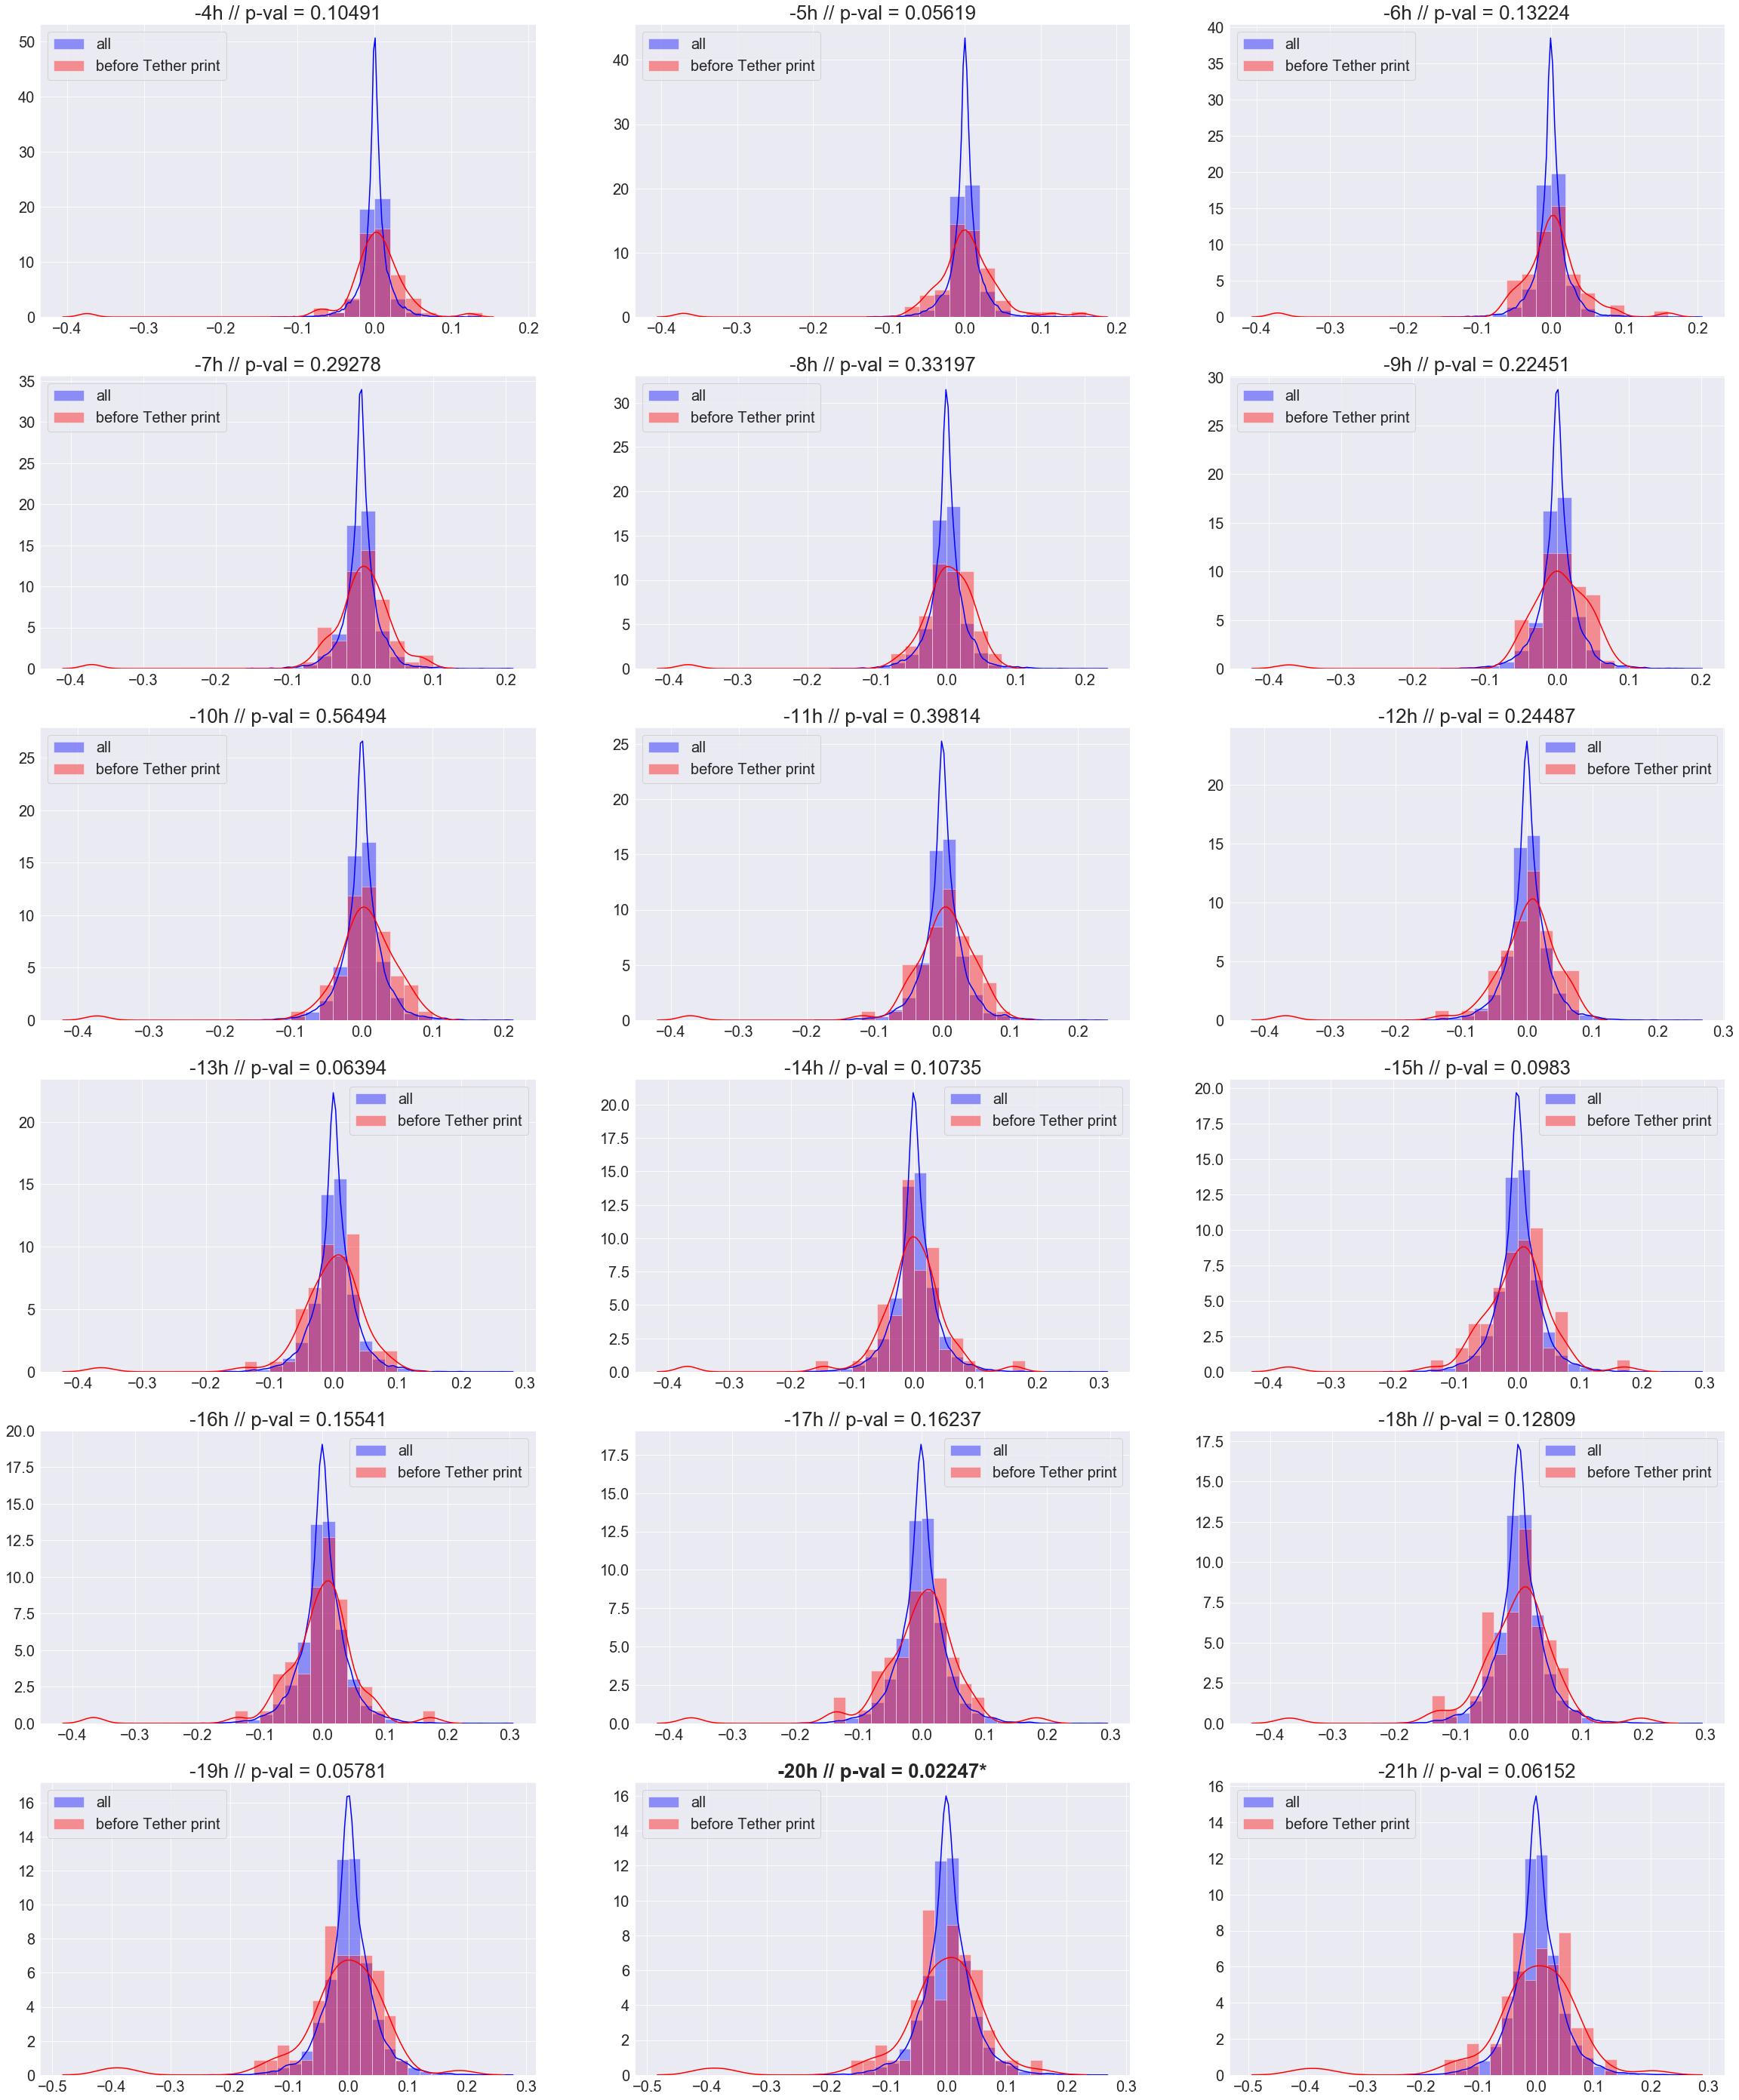

In [16]:
matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize(40,50))
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
pvals_x = []
pvals_y = []
counter = 1
for n in range(1, 49):
    all_before_variations = [(data_y[x]-data_y[x-n])/data_y[x-n] for x in range(n, len(data_y))]
    tether_before_variations = [(data_y[find_next_idx(x)]-data_y[find_next_idx(x)-n])/data_y[find_next_idx(x)-n]  for x in transactions_x[1:]]

    H, pValue, KSstatistic = kolmogorov_smirnov(all_before_variations, tether_before_variations, 0.05, "smaller")
    pvals_x.append("-{}".format(n))
    pvals_y.append(pValue)
    
    if n in list(range(4,22)):
        ax = fig.add_subplot(6,3,counter)
        counter += 1
        sns.distplot(all_before_variations, bins=list(np.arange(-0.2, 0.2, 0.02)), ax=ax, color="b", label="all")
        sns.distplot(tether_before_variations, bins=list(np.arange(-0.2, 0.2, 0.02)), ax=ax, color="r", label="before Tether print")
        star = "*" if pValue < 0.05 else ""
        if star == "*":
            fontweight=600
        else:
            fontweight=200
        ax.set_title("-{}h // p-val = {}{}".format(n, round(pValue, 5), star), fontsize=26, fontweight=fontweight)
        ax.legend()

Text(0.5, 1.0, 'p-value for the one-sided (smaller) Kolmogorov-Smirnov test')

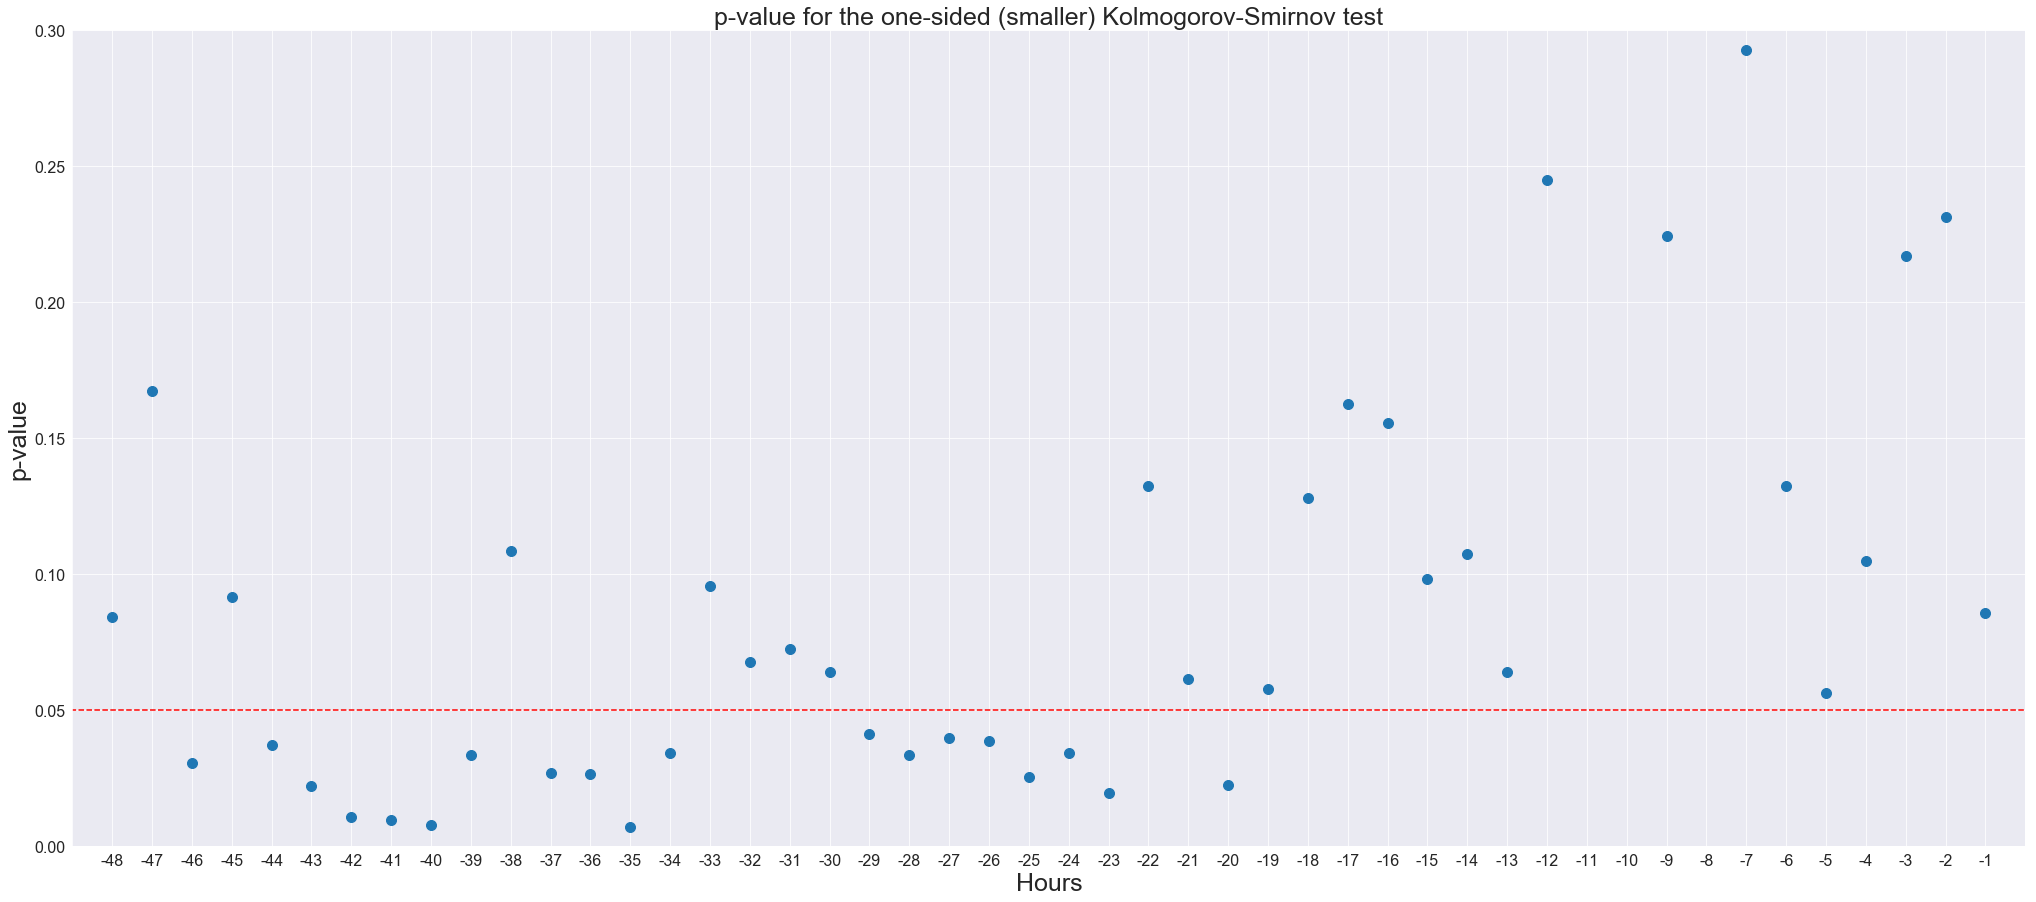

In [17]:
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(35,15))
pvals_x.reverse()
pvals_y.reverse()
plt.plot(list(range(len(pvals_y))), pvals_y, "o", markersize=10)
plt.xlim([-1,48])
plt.ylim([0,0.30])
plt.plot([-10, 55], [0.05, 0.05], "--", color="r")
plt.xticks(list(range(len(pvals_y))), pvals_x)
plt.xlabel("Hours", fontsize=25)
plt.ylabel("p-value", fontsize=25)
plt.title("p-value for the one-sided (smaller) Kolmogorov-Smirnov test", fontsize=25)

### 0h->+xh in Tether printing events vs All 0h->+xh variations

<Figure size 2880x3600 with 0 Axes>

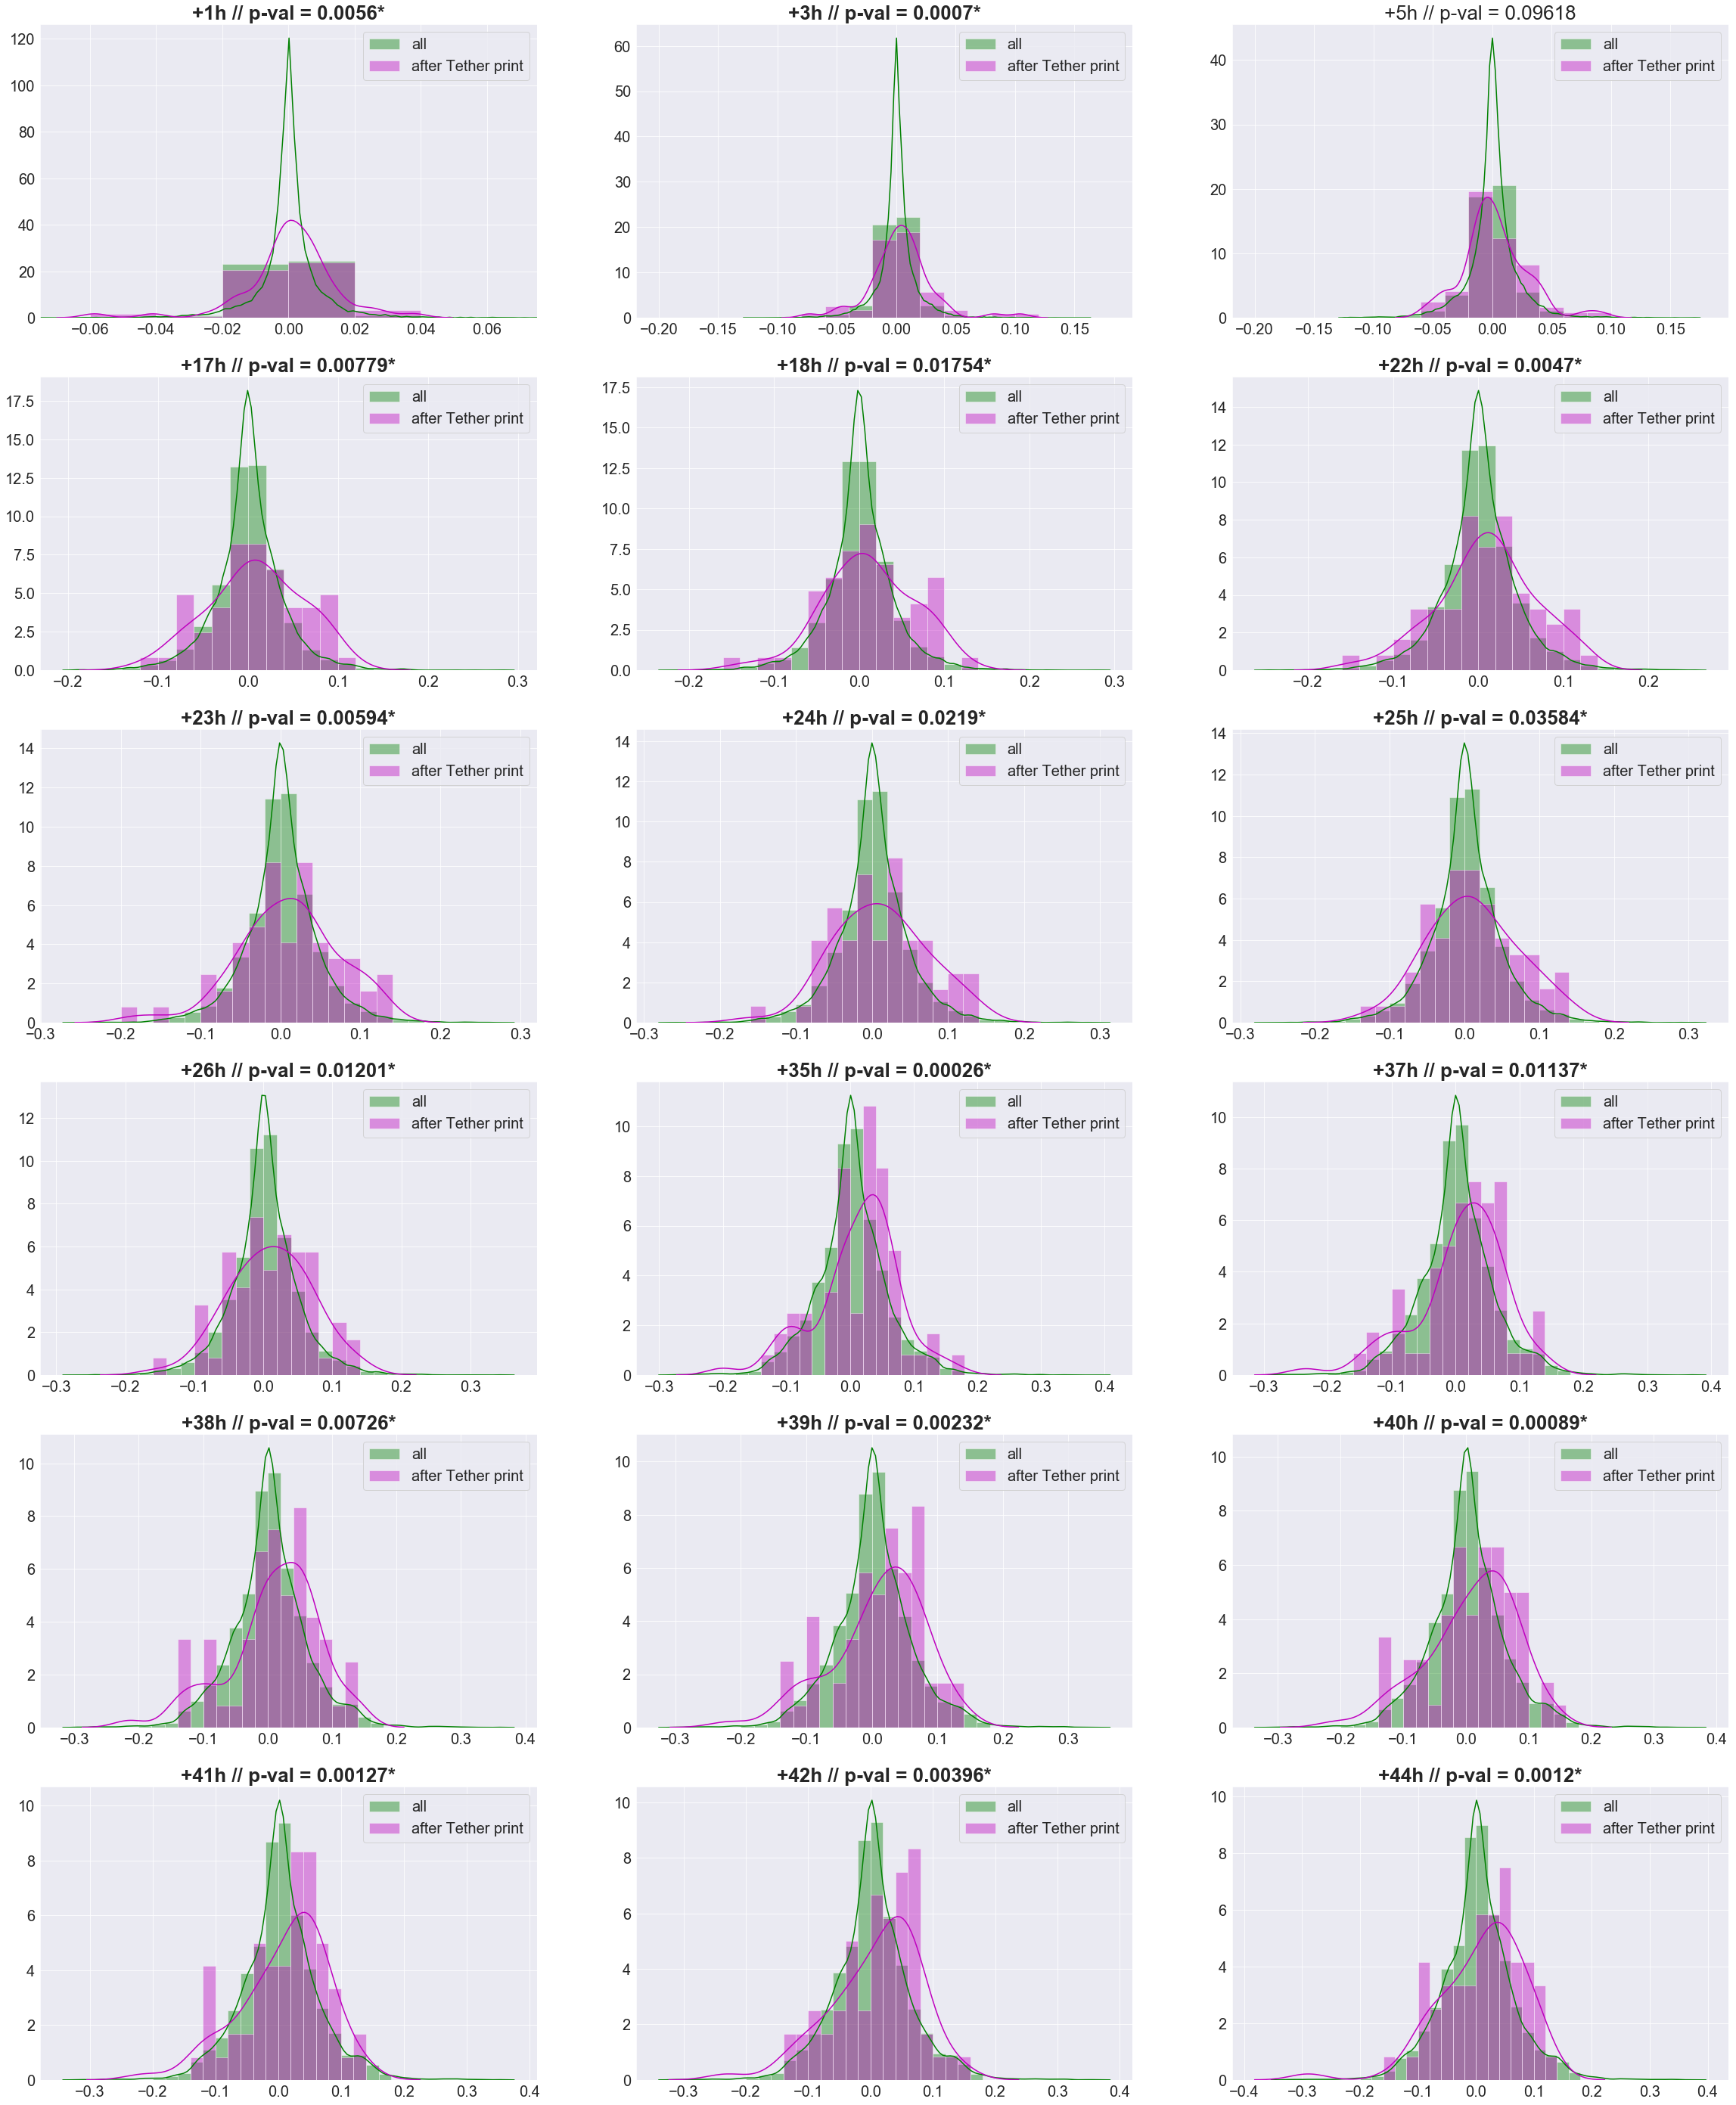

In [18]:
matplotlib.rcParams.update({'font.size': 20})
plt.figure(figsize(40,50))
fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
pvals_x = []
pvals_y = []
counter = 1
for n in range(1, 49):
    all_after_variations = [(data_y[x+n]-data_y[x])/data_y[x] for x in range(0, len(data_y)-n)]
    tether_after_variations = [(data_y[find_next_idx(x)+n]-data_y[find_next_idx(x)])/data_y[find_next_idx(x)]  for x in transactions_x]
   
    H, pValue, KSstatistic = kolmogorov_smirnov(all_after_variations, tether_after_variations, 0.05, "larger")
    pvals_x.append("+{}".format(n))
    pvals_y.append(pValue)
    
    if n in [1,3,5,17,18,22,23,24,25,26,35,37,38,39,40,41,42,44]:
        ax = fig.add_subplot(6, 3, counter)
        counter += 1
        sns.distplot(all_after_variations, bins=list(np.arange(-0.2, 0.2, 0.02)), ax=ax, color="g", label="all")
        sns.distplot(tether_after_variations, bins=list(np.arange(-0.2, 0.2, 0.02)), ax=ax, color="m", label="after Tether print")
        star = "*" if pValue < 0.05 else ""
        if star == "*":
            fontweight=600
        else:
            fontweight=200
        ax.set_title("+{}h // p-val = {}{}".format(n, round(pValue, 5), star), fontsize=26, fontweight=fontweight)
        if n == 1:
            ax.set_xlim([-0.075,0.075])
        ax.legend()

Text(0, 0.5, 'p-value')

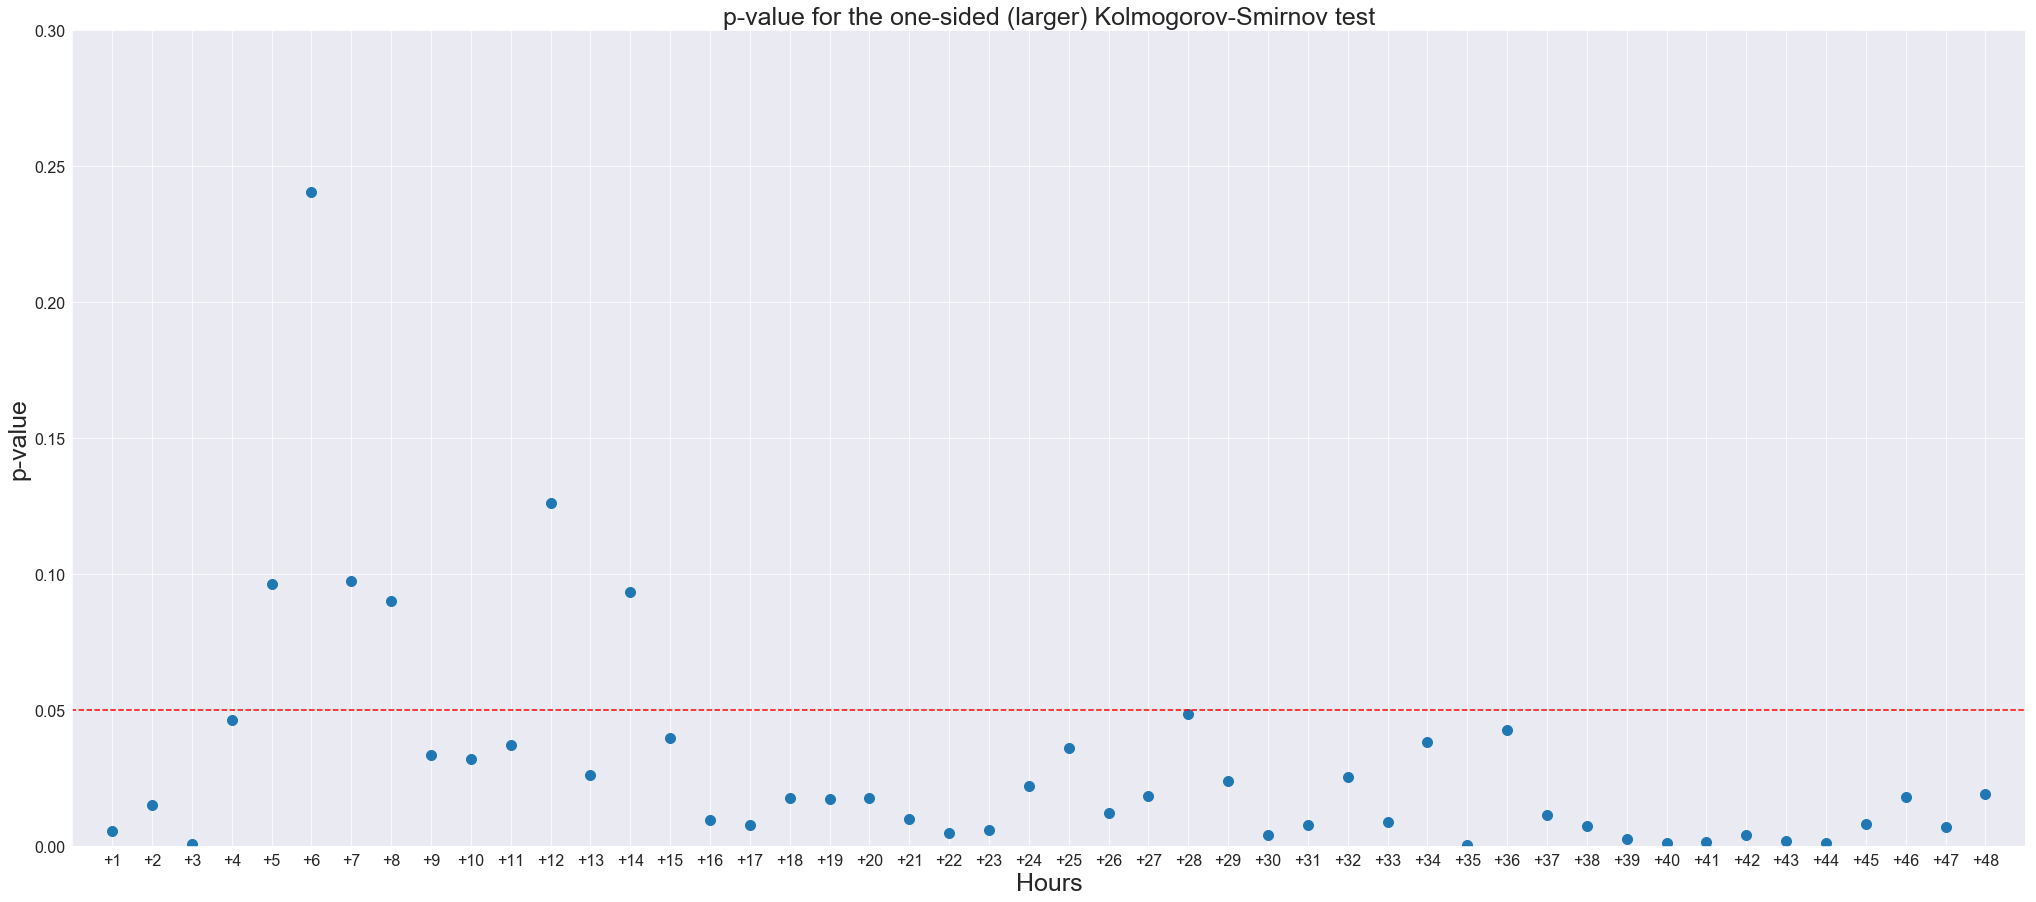

In [19]:
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(35,15))
plt.plot(list(range(len(pvals_y))), pvals_y, "o", markersize=10)
plt.xlim([-1,48])
plt.ylim([0,0.30])
plt.plot([-10, 55], [0.05, 0.05], "--", color="r")
plt.xticks(list(range(len(pvals_y))), pvals_x)
plt.title("p-value for the one-sided (larger) Kolmogorov-Smirnov test", fontsize=25)
plt.xlabel("Hours", fontsize=25)
plt.ylabel("p-value", fontsize=25)

## Simulation of bitcoin price evolution without Tether-manipulated rises

### alpha = 0.05

In [20]:
ydata_no_rises = deepcopy(data_y)

In [21]:
# up to +48 hours changes with alpha = 0.05
alpha = 0.05
todel = []
for n in range(1, 49):
    all_after_variations = [(data_y[x+n]-data_y[x])/data_y[x] for x in range(0, len(data_y)-n)]
    tether_after_variations = [(data_y[find_next_idx(x)+n]-data_y[find_next_idx(x)])/data_y[find_next_idx(x)]  for x in transactions_x]
    tether_after_variations_idx = [find_next_idx(x)+n for x in transactions_x]
    H, pValue, KSstatistic = kolmogorov_smirnov(all_after_variations, tether_after_variations, alpha, "larger")
    if H == 1:
        todel.append(tether_after_variations_idx)

In [22]:
todel = np.unique(np.array(todel).flatten())
print("There are {} 1-h candles ({} days) to be removed which are stat. significant higher than average".format(len(todel), len(todel)/24))

There are 1686 1-h candles (70.25 days) to be removed which are stat. significant higher than average


In [23]:
# for the simulation we remove the price from all subsequent candlesticks plus substitute the candles by an interpolation
for idx in todel:
    delta = ydata_no_rises[idx]-ydata_no_rises[idx-1] # absolute terms
    # remove the delta to all subsequent points
    for j in range(idx+1, len(ydata_no_rises)):
        ydata_no_rises[j] -= delta
    # interpolate the value
    ydata_no_rises[idx] = (ydata_no_rises[idx-1]+ydata_no_rises[idx+1])/2

### alpha = 0.1

In [24]:
ydata_no_rises_01 = deepcopy(data_y)
# up to +48 hours changes with alpha = 0.05
alpha = 0.1
todel = []
for n in range(1, 49):
    all_after_variations = [(data_y[x+n]-data_y[x])/data_y[x] for x in range(0, len(data_y)-n)]
    tether_after_variations = [(data_y[find_next_idx(x)+n]-data_y[find_next_idx(x)])/data_y[find_next_idx(x)]  for x in transactions_x]
    tether_after_variations_idx = [find_next_idx(x)+n for x in transactions_x]
    H, pValue, KSstatistic = kolmogorov_smirnov(all_after_variations, tether_after_variations, alpha, "larger")
    if H == 1:
        todel.append(tether_after_variations_idx)
todel = np.unique(np.array(todel).flatten())
print("There are {} 1-h candles ({} days) to be removed which are stat. significant higher than average".format(len(todel), len(todel)/24))
for idx in todel:
    delta = ydata_no_rises_01[idx]-ydata_no_rises_01[idx-1] # absolute terms
    for j in range(idx+1, len(ydata_no_rises_01)):
        ydata_no_rises_01[j] -= delta
    ydata_no_rises_01[idx] = (ydata_no_rises_01[idx-1]+ydata_no_rises_01[idx+1])/2

There are 1793 1-h candles (74.70833333333333 days) to be removed which are stat. significant higher than average


Text(0, 0.5, 'Bitcoin price ($)')

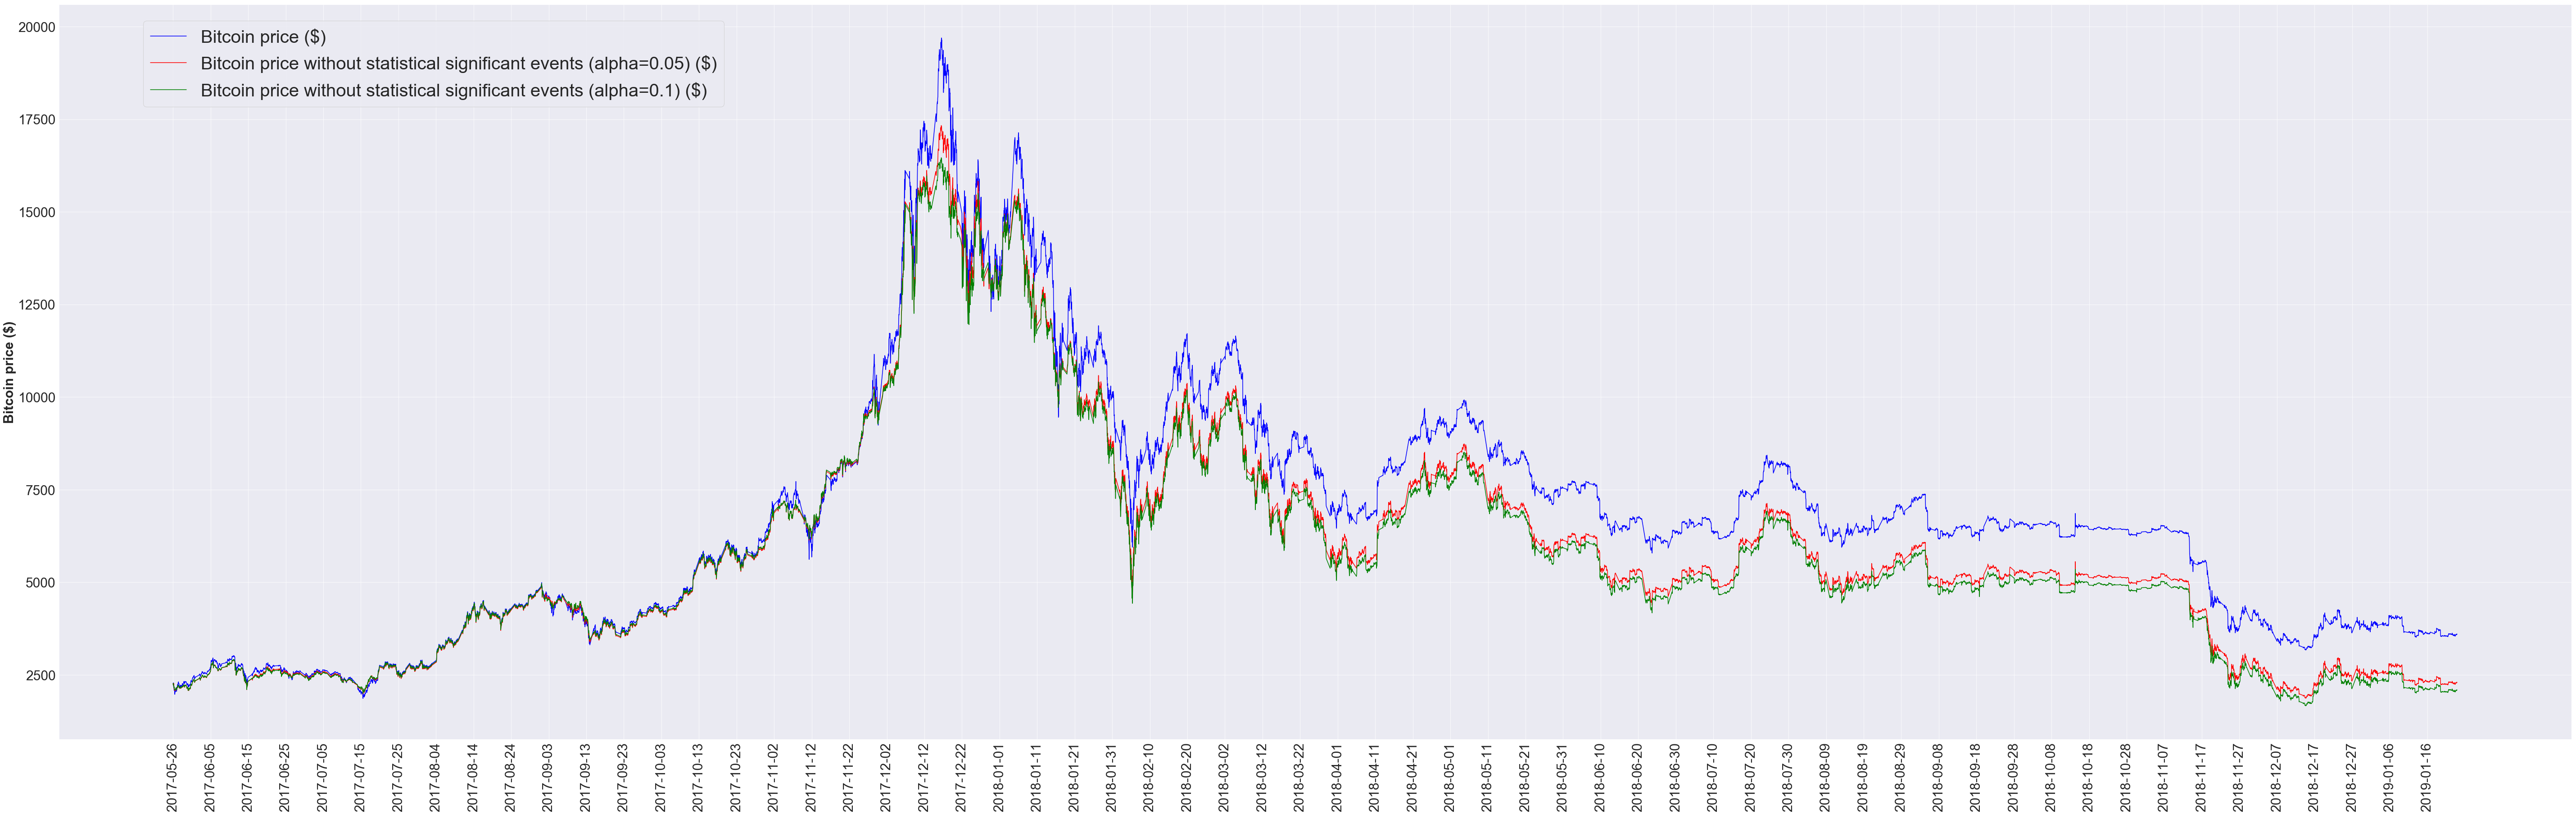

In [25]:
matplotlib.rcParams.update({'font.size': 30})
fig, ax1 = plt.subplots(figsize=(100,30))

plt.xticks(list(np.arange(data_x[0], data_x[-1], 10*24*3600)), [mkdate(x) for x in list(np.arange(data_x[0], data_x[-1], 10*24*3600))], rotation='vertical')

ax1.plot(data_x, data_y, label="Bitcoin price ($)", color="b")
ax1.plot(data_x, ydata_no_rises, label="Bitcoin price without statistical significant events (alpha=0.05) ($)", color="r")
ax1.plot(data_x, ydata_no_rises_01, label="Bitcoin price without statistical significant events (alpha=0.1) ($)", color="g")
ax1.legend(loc='upper left', fontsize=40, bbox_to_anchor=(0.03, 0.99))
ax1.set_ylabel("Bitcoin price ($)", fontsize=30, fontweight=600)

In [26]:
import pandas as pd
ATH_idx = np.argmax(data_y)
ATH_price = data_y[ATH_idx]
ATH005 = ydata_no_rises[ATH_idx]
ATH005_perc = ((ATH005-ATH_price)/ATH_price)*100
ATH01 = ydata_no_rises_01[ATH_idx]
ATH01_perc = ((ATH01-ATH_price)/ATH_price)*100
cur_price = data_y[-1]
cur_005 = ydata_no_rises[-1]
cur_005_perc = ((cur_005-cur_price)/cur_price)*100
cur_01 = ydata_no_rises_01[-1]
cur_01_perc = ((cur_01-cur_price)/cur_price)*100

In [27]:
print("all time high:", mkdate(data_x[ATH_idx]))

all time high: 2017-12-17


In [28]:
df = pd.DataFrame({
   'All-time-high (ATH)': {"real price": ATH_price, 
           "price excluding alpha=0.05": ATH005, 
           "% excluding alpha=0.05": ATH005_perc,
           "price excluding alpha=0.1": ATH01, 
           "% excluding alpha=0.1": ATH01_perc
          },
   'Currently (12-7-2018)': {"real price": cur_price, 
           "price excluding alpha=0.05": cur_005, 
           "% excluding alpha=0.05": cur_005_perc,
           "price excluding alpha=0.1": cur_01, 
           "% excluding alpha=0.1": cur_01_perc
            }
})
df.to_csv("simulation.csv")
df

,All-time-high (ATH),Currently (12-7-2018)
% excluding alpha=0.05,-12.363743,-36.184132
% excluding alpha=0.1,-16.775957,-41.909188
price excluding alpha=0.05,17259.680400,2294.684600
price excluding alpha=0.1,16390.709000,2088.823600
real price,19694.680000,3595.790000
